In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## EDA

In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

As we see there are alot of nan value in column 3,4,5 so we decides to drop this column

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df[df.duplicated()].shape

(403, 2)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
df.v1=lb.fit_transform(df.v1)

In [14]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x1c0382a77f0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

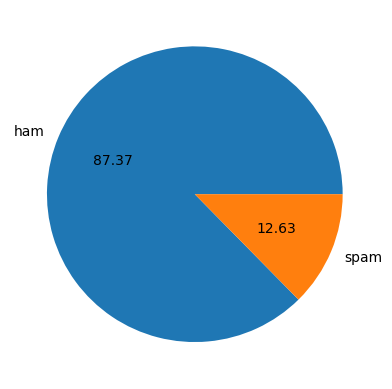

In [15]:
plt.pie(df.v1.value_counts(),labels=['ham','spam'],autopct='%.2f')

In [16]:
# no of sentenses

In [17]:
df.rename(columns={'v1':'spam','v2':'text'},inplace=True)

In [18]:
df

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
import nltk

In [20]:
# created a column that contains no. of senstense

In [21]:
df['total_char']=df.text.map(len)

In [22]:
df['total_words']=df.text.map(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df['no_sentense']=df.text.map(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df

,spam,text,total_char,total_words,no_sentense
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df[[ 'total_char','total_words','no_sentense']].describe()

,total_char,total_words,no_sentense
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam message

In [27]:
df[df.spam==0][[ 'total_char','total_words','no_sentense']].describe()

,total_char,total_words,no_sentense
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df.spam==1][[ 'total_char','total_words','no_sentense']].describe()

,total_char,total_words,no_sentense
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='total_char', ylabel='Count'>

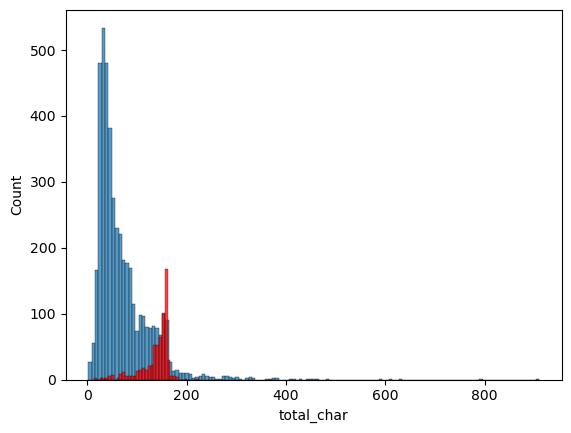

In [29]:
sns.histplot(df[df.spam==0]['total_char'])
sns.histplot(df[df.spam==1]['total_char'],color='red')

<AxesSubplot:xlabel='total_words', ylabel='Count'>

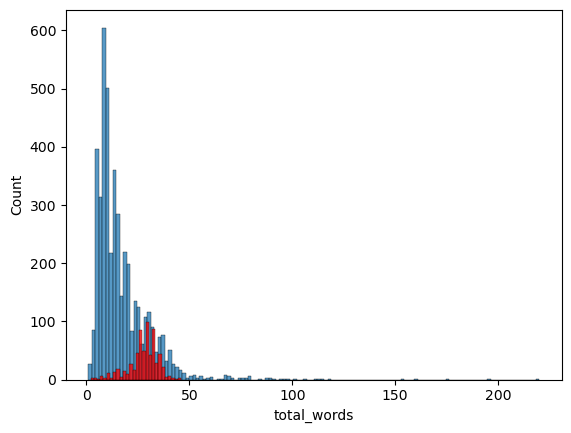

In [30]:
sns.histplot(df[df.spam==0]['total_words'])
sns.histplot(df[df.spam==1]['total_words'],color='red')

<AxesSubplot:xlabel='no_sentense', ylabel='Count'>

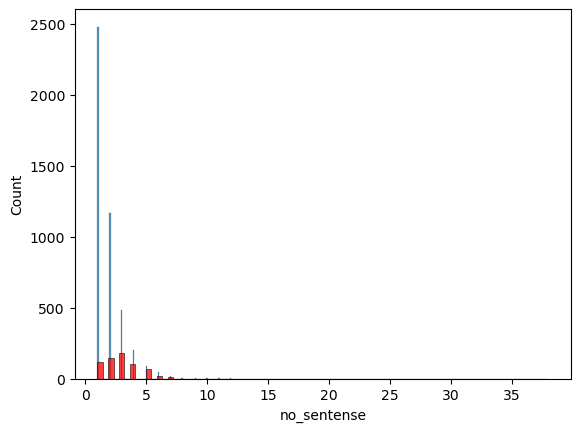

In [31]:
sns.histplot(df[df.spam==0]['no_sentense'])
sns.histplot(df[df.spam==1]['no_sentense'],color='red')

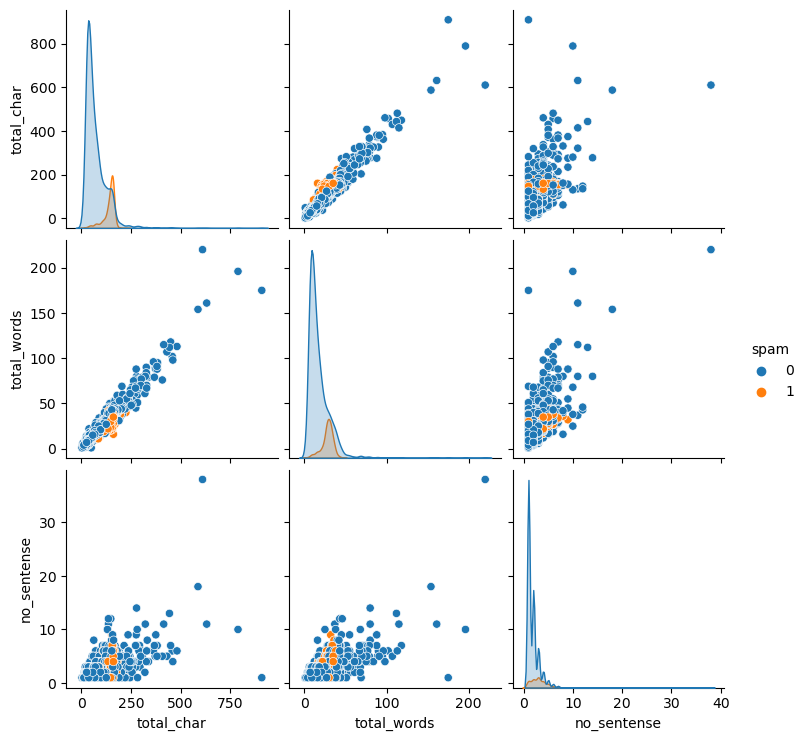

In [32]:
sns.pairplot(df,hue='spam')

<AxesSubplot:>

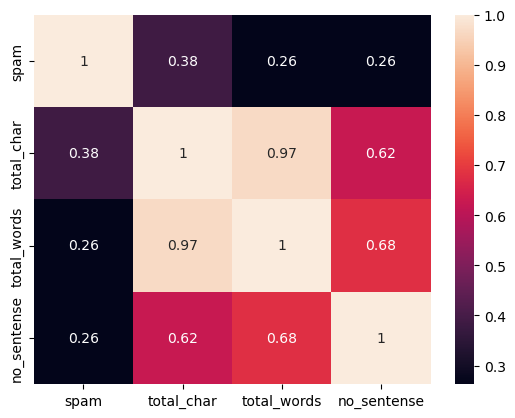

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
# text data preprocessing for spam detection

In [35]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [36]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem import PorterStemmer
stemer=PorterStemmer()

In [39]:
def text_process(x):
    y=nltk.word_tokenize(x.lower())
    k=[]
    for i in y:
        if i.isalnum():
            k.append(i)
    y=k[:]
    k.clear()
    for i in y:
        if i not in stopwords and i not in punc :
            k.append(i)
    y=k[:]
    k.clear()
    for i in y:
        k.append(stemer.stem(i))
    return ' '.join(k)
    

In [40]:
text_process('i love the YT lecture on machine learning !, how about you ')

'love yt lectur machin learn'

In [41]:
df['transform_text']=df.text.map(text_process)

In [42]:
df

,spam,text,total_char,total_words,no_sentense,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [43]:
from wordcloud import WordCloud
wt= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_img=wt.generate(df[df.spam==1]['transform_text'].str.cat(sep=' '))

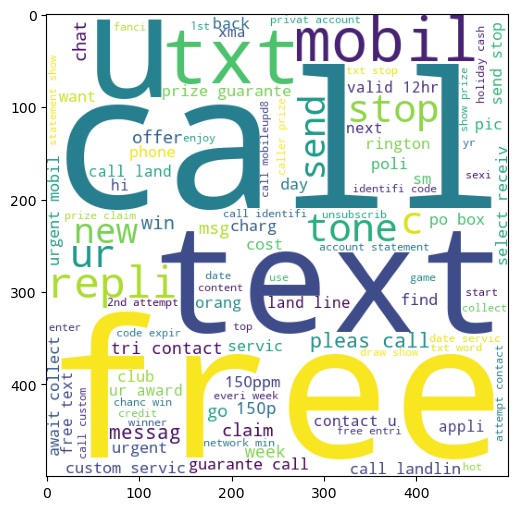

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_img)

In [46]:
ham_img=wt.generate(df[df.spam==0]['transform_text'].str.cat(sep=' '))

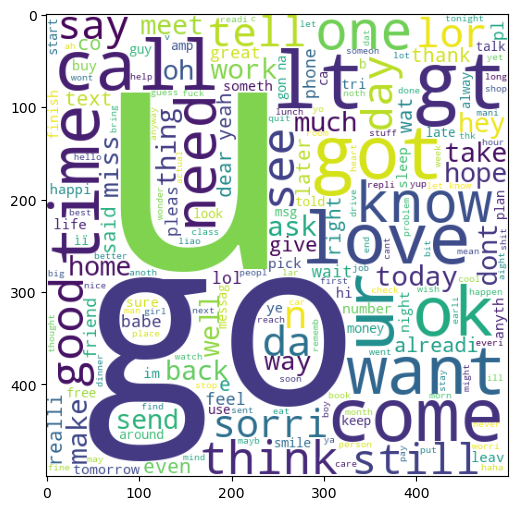

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_img)

In [48]:
words=[]
for i in df[df.spam==1]['transform_text'].to_list():
    for word in i.split():
        words.append(word)
        

In [49]:
len(words)

9939

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


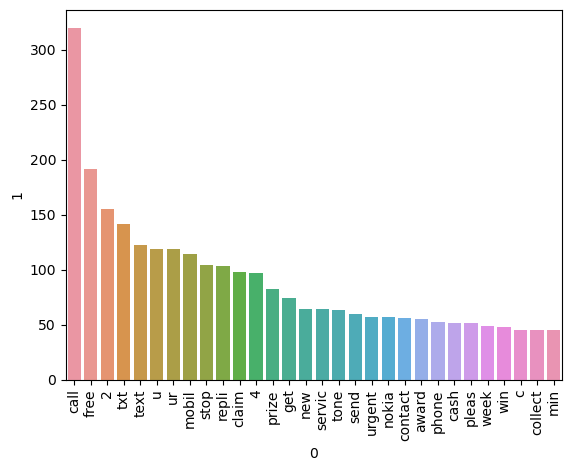

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(words).most_common(30))[0],pd.DataFrame(Counter(words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_words=[]
for i in df[df.spam==0]['transform_text'].to_list():
    for word in i.split():
        ham_words.append(word)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


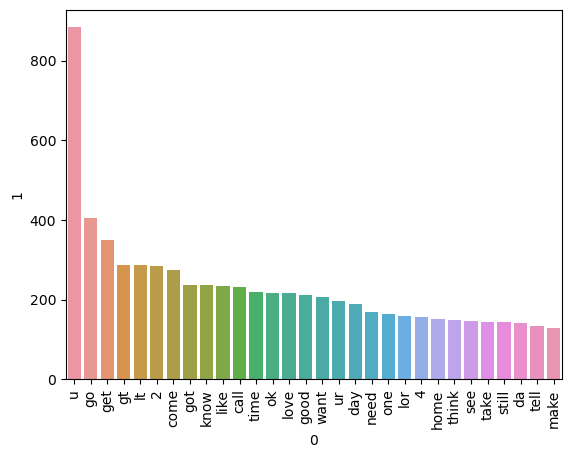

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## train model

In [60]:
df.transform_text

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transform_text, Length: 5169, dtype: object

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv=CountVectorizer()

In [65]:
x=cv.fit_transform(df.transform_text).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
y=df.spam.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [73]:
from sklearn import metrics

In [72]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [74]:
mlt=MultinomialNB()
br=BernoulliNB()
gs=GaussianNB()

In [75]:
models=[mlt,br,gs]

In [77]:
for model in models:
    model.fit(X_train,y_train)
    print(model,metrics.classification_report(y_test,model.predict(X_test)))

MultinomialNB()               precision    recall  f1-score   support

           0       0.99      0.98      0.99       908
           1       0.87      0.92      0.90       126

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034

BernoulliNB()               precision    recall  f1-score   support

           0       0.96      0.99      0.98       908
           1       0.94      0.73      0.82       126

    accuracy                           0.96      1034
   macro avg       0.95      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034

GaussianNB()               precision    recall  f1-score   support

           0       0.98      0.87      0.92       908
           1       0.48      0.87      0.61       126

    accuracy                           0.87      1034
   macro avg       0.73      0.87      0.77      1034
weighted avg       0.92      0.

##### for spam detection precision is most important metrics hence we decides to go with  multimomialNB as it is having best metrics score . 

## Exporting MultinomilNB model Using pickle

In [79]:
import pickle
pickle.dump(mlt,open('model.pkl','wb'))
pickle.dump(cv,open('vectorizer.pkl','wb'))